In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Process mining course/project_2')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing

In [ ]:
# load dataset
# going to use training data because testing data does not have a label so we can't evaluate accuracy
df = pd.read_csv(r'train.csv')

# drop columns that are not helpful
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

#encode gender and embarked
df = pd.get_dummies(df, columns=["Sex","Embarked"])

# drop NAs
def drop_rows_with_nas(df):
    # Identify rows with missing values
    rows_with_nas = df[df.isna().any(axis=1)].index.tolist()
    
    if rows_with_nas:
        # Drop rows with missing values
        df = df.drop(rows_with_nas)
        print(f"Dropped rows with missing values: {rows_with_nas}")
    
    return df

df = drop_rows_with_nas(df)

# separate dependent variable
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values



Dropped rows with missing values: [5, 17, 19, 26, 28, 29, 31, 32, 36, 42, 45, 46, 47, 48, 55, 64, 65, 76, 77, 82, 87, 95, 101, 107, 109, 121, 126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186, 196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264, 270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330, 334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388, 409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457, 459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507, 511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563, 564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612, 613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680, 692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768, 773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837, 839, 846, 849, 859, 863, 868, 878, 888]


In [ ]:
# split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [ ]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM

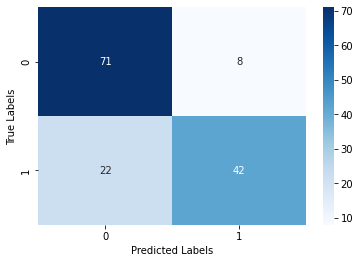

Accuracy: 0.7902097902097902


In [ ]:
from sklearn.svm import SVC

# train the model
svc_classifier = SVC(kernel = 'rbf', random_state = 0)
svc_classifier.fit(X_train_scaled, y_train)

# predict on testing data
svc_y_pred = svc_classifier.predict(X_test_scaled)

# make the confusion matrix
cm = confusion_matrix(y_test, svc_y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# calculate accuracy
accuracy = accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

# Logistic Regression

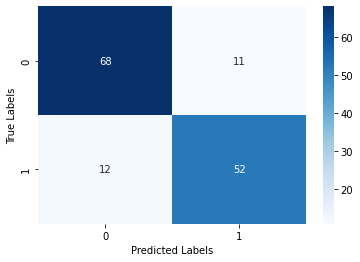

Accuracy: 0.8391608391608392


In [ ]:
logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(X_train_scaled,y_train)

# predict test set results
logistic_y_pred = logistic_classifier.predict(X_test_scaled)

# make the confusion matrix
cm = confusion_matrix(y_test, logistic_y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# calculate accuracy
accuracy = accuracy_score(y_test, logistic_y_pred)
print("Accuracy:", accuracy)

# K-NN

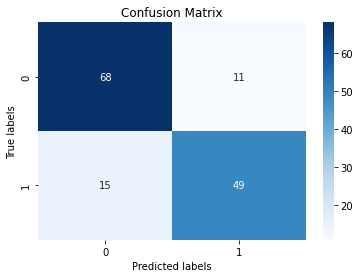

Accuracy: 0.8181818181818182


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='cityblock')
knn_classifier.fit(X_train_scaled,y_train)

knn_y_pred = knn_classifier.predict(X_test_scaled)

# make the confusion matrix
cm =  confusion_matrix(y_test, knn_y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# calculate accuracy
accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy:", accuracy)

# Decision Tree

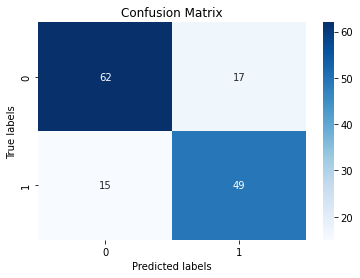

Accuracy: 0.7762237762237763


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# train model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)

# make predictions
dt_y_pred = dt_classifier.predict(X_test_scaled)

# make the confusion matrix
cm =  confusion_matrix(y_test, dt_y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# calculate accuracy score
accuracy = accuracy_score(y_test, dt_y_pred)
print("Accuracy:", accuracy)


# Random Forest

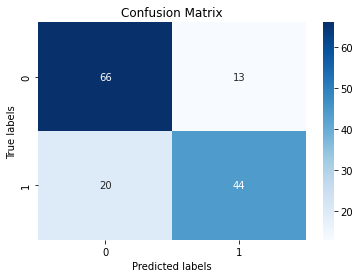

Accuracy: 0.7692307692307693


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# train model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

# make predictions on test data
rf_y_pred = rf_classifier.predict(X_test_scaled)

# make the confusion matrix
cm =  confusion_matrix(y_test, rf_y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# calculate accuracy
accuracy = accuracy_score(y_test, rf_y_pred)

print("Accuracy:", accuracy)


# Naive Bayes

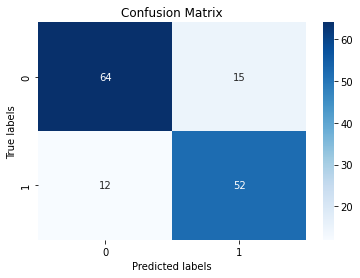

Accuracy: 0.8111888111888111


In [ ]:
from sklearn.naive_bayes import GaussianNB

# train the model
# don't need to scale for Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
nb_y_pred = nb_classifier.predict(X_test)

# make the confusion matrix
cm =  confusion_matrix(y_test, nb_y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, nb_y_pred)

print("Accuracy:", accuracy)
